# Análise exploratório dos dados do VAAR (Valor Aluno Ano por Resultados) e VAAT (Valor Aluno Ano Total) do Fundeb para 2024

#### Informações de 2024: https://www.gov.br/fnde/pt-br/acesso-a-informacao/acoes-e-programas/financiamento/fundeb/2024-1
Especificamente as tabelas de dados utilizados são:
- VAAR: https://www.gov.br/fnde/pt-br/acesso-a-informacao/acoes-e-programas/financiamento/fundeb/2024/Redesinabilitadaspormotivo.pdf
- VAAT: https://www.gov.br/fnde/pt-br/acesso-a-informacao/acoes-e-programas/financiamento/fundeb/ListafinalhabilitaoVAAT202431agosto2023.pdf

Acesso realizado em 29/01/2024

Informações sobre os pagamentos:

https://www.cnm.org.br/comunicacao/noticias/cnm-esclarece-regras-da-complementacao-vaat-e-vaar-da-uniao-ao-fundeb

A lei que regulamenta o Fundeb é a Lei nº 14.113, de 25 de dezembro de 2020 (https://www.planalto.gov.br/ccivil_03/_ato2019-2022/2020/lei/l14113.htm)

###### Objetivos:
- Conferir se todas as 5595 redes estão presentes nos documentos (5568 redes municipais + 27 redes estaduais).
- Análise exploratória e visualização dos dados.
- Exportar os dados para excel e google planilhas para fácil uso por outros usuários.

In [67]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tabula
import textwrap

# VAAR (Valor Aluno Ano por Resultado):

A Lei 14.113/2020, que regulamentou o novo Fundeb, estabeleceu cinco condicionalidades para que os entes federados possam concorrer a receber os recursos da complementação-VAAR (Valor Aluno Ano por Resultados). No entanto, cabia aos Municípios atender, com informações junto ao SIMEC, duas dessas condicionalidades: 
- cargo ou função de gestor escolar provido por critérios técnicos de mérito e desempenho (I) e;
- referenciais curriculares alinhados à BNCC (V).

A condicionalidade II foi suspensa para 2023, a condicionalidade III foi calculada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep) e a condicionalidade IV é de responsabilidade dos Estados com aprovação da lei estadual do ICMS-Educação.

Não basta estar habilitado a concorrer a receber a complementação-VAAR. Além disso, é preciso que a rede municipal ou estadual apresente melhoria dos indicadores educacionais relativos a taxas de atendimento educacional na educação básica, taxas de aprovação nos ensinos fundamental e médio, e resultados de aprendizagem dos estudantes nos exames nacionais de avaliação da educação básica.

**Lei nº 14.113, de 25 de dezembro de 2020:**

Art. 14.  A complementação-VAAR será distribuída às redes públicas de ensino que cumprirem as condicionalidades e apresentarem melhoria dos indicadores referidos no inciso III do caput do art. 5º desta Lei.

§ 1º  As condicionalidades referidas no caput deste artigo contemplarão:

I - provimento do cargo ou função de gestor escolar de acordo com critérios técnicos de mérito e desempenho ou a partir de escolha realizada com a participação da comunidade escolar dentre candidatos aprovados previamente em avaliação de mérito e desempenho;

II - participação de pelo menos 80% (oitenta por cento) dos estudantes de cada ano escolar periodicamente avaliado em cada rede de ensino por meio dos exames nacionais do sistema nacional de avaliação da educação básica;

III - redução das desigualdades educacionais socioeconômicas e raciais medidas nos exames nacionais do sistema nacional de avaliação da educação básica, respeitadas as especificidades da educação escolar indígena e suas realidades;

IV - regime de colaboração entre Estado e Município formalizado na legislação estadual e em execução, nos termos do inciso II do parágrafo único do art. 158 da Constituição Federal e do art. 3º da Emenda Constitucional nº 108, de 26 de agosto de 2020;

V - referenciais curriculares alinhados à Base Nacional Comum Curricular, aprovados nos termos do respectivo sistema de ensino.

In [2]:
# Caminho para o seu arquivo PDF
caminho_pdf_VAAR = r"C:\Users\hugob\Dropbox\Hugo_Bovareto\Fundeb 2024\VAAR_2024.xlsx"

Essa base do VAAR são só das redes inabilitadas.

In [3]:
# Ler a planilha do Excel em um dataframe
df_VAAR = pd.read_excel(caminho_pdf_VAAR)

In [4]:
df_VAAR

,UF,Ente Federado,Código IBGE,Motivo
0,AC,ACRE,12,Não apresentou melhoria em nenhum dos indicado...
1,AC,ACRELANDIA,1200013,Não apresentou melhoria em nenhum dos indicado...
2,AC,ASSIS BRASIL,1200054,"Não cumprimento do disposto no art. 14, § 1º, ..."
3,AC,CRUZEIRO DO SUL,1200203,"Não cumprimento do disposto no art. 14, § 1º, ..."
4,AC,JORDAO,1200328,Não apresentou melhoria em nenhum dos indicado...
...,...,...,...,...
3054,TO,TAIPAS DO TOCANTINS,1720937,Não apresentou melhoria em nenhum dos indicado...
3055,TO,TOCANTINIA,1721109,"Não cumprimento do disposto no art. 14, § 1º, ..."
3056,TO,TOCANTINS,17,"Não cumprimento do disposto no art. 14, § 1º, ..."
3057,TO,TUPIRATINS,1721307,"Não cumprimento do disposto no art. 14, § 1º, ..."


### Estados:

In [14]:
# Dataframe dos estados:
# Filtrando as linhas com valores de 2 dígitos na coluna 'Código IBGE':
df_VAAR_estados = df_VAAR[df_VAAR['Código IBGE'].astype(str).str.len() == 2]

df_VAAR_estados

,UF,Ente Federado,Código IBGE,Motivo
0,AC,ACRE,12,Não apresentou melhoria em nenhum dos indicado...
258,CE,CEARÁ,23,"Não cumprimento do disposto no art. 14, § 1º, ..."
324,DF,DISTRITO FEDERAL,53,"Não cumprimento do disposto no art. 14, § 1º, ..."
564,MA,MARANHÃO,21,"Não cumprimento do disposto no art. 14, § 1º, ..."
927,MG,MINAS GERAIS,31,"Não cumprimento do disposto no art. 14, § 1º, ..."
1187,MS,MATO GROSSO DO SUL,50,"Não cumprimento do disposto no art. 14, § 1º, ..."
1242,MT,MATO GROSSO,51,"Não cumprimento do disposto no art. 14, § 1º, ..."
1574,PI,PIAUÍ,22,Não apresentou melhoria em nenhum dos indicado...
1864,RJ,RIO DE JANEIRO,33,"Não cumprimento do disposto no art. 14, § 1º, ..."
1988,RR,RORAIMA,14,"Não cumprimento do disposto no art. 14, § 1º, ..."


In [19]:
# Salvar no Excel:
df_VAAR_estados.to_excel("df_VAAR_estados.xlsx", index=False)

In [21]:
# Calculando a contagem de frequência dos valores na coluna 'Motivo':
frequencia_VAAR_estados = df_VAAR_estados['Motivo'].value_counts()
frequencia_VAAR_estados

Motivo
Não cumprimento do disposto no art. 14, § 1º, III da Lei nº 14113/2020                                                                                                                                            4
Não apresentou melhoria em nenhum dos indicadores de atendimento e de melhoria da aprendizagem com redução das desigualdades, conforme metodologia constante da Portaria MEC nº 975, de 13 de dezembro de 2022    3
Não cumprimento do disposto no art. 14, § 1º, I, III da Lei nº 14113/2020                                                                                                                                         2
Não cumprimento do disposto no art. 14, § 1º, V da Lei nº 14113/2020                                                                                                                                              2
Não cumprimento do disposto no art. 14, § 1º, I da Lei nº 14113/2020                                                                             

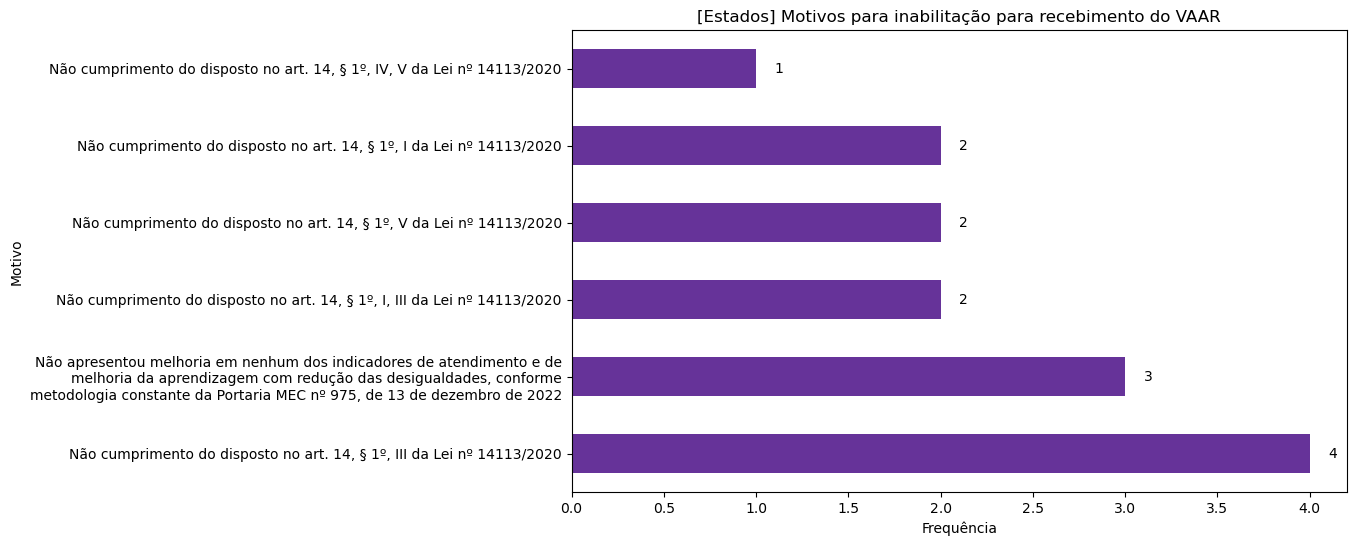

In [90]:
# Visualização:
# Função para wrap dos rótulos:
def wrap_labels(labels, width=15):
    wrapped_labels = [textwrap.fill(label, width) for label in labels]
    return wrapped_labels

# Aplicar a função de wrap aos rótulos
frequencia_VAAR_estados.index = frequencia_VAAR_estados.index.to_series().apply(lambda x: textwrap.fill(x, width=75))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
grafico = frequencia_VAAR_estados.plot(kind='barh', color='rebeccapurple')

# Adicionar rótulos aos dados
for i, v in enumerate(frequencia_VAAR_estados):
    plt.text(v + 0.1, i, str(v), ha='left', va='center')

plt.title('[Estados] Motivos para inabilitação para recebimento do VAAR')
plt.xlabel('Frequência')
plt.ylabel('Motivo')

# Salvar o gráfico:
plt.savefig('Estados_VAAR.png', bbox_inches='tight')  # bbox_inches='tight' evita que o título seja cortado

plt.show()

### Municípios:

In [91]:
# Dataframe dos municípios:
df_VAAR_municipios = df_VAAR.drop(df_VAAR_estados.index)

df_VAAR_municipios

,UF,Ente Federado,Código IBGE,Motivo
1,AC,ACRELANDIA,1200013,Não apresentou melhoria em nenhum dos indicado...
2,AC,ASSIS BRASIL,1200054,"Não cumprimento do disposto no art. 14, § 1º, ..."
3,AC,CRUZEIRO DO SUL,1200203,"Não cumprimento do disposto no art. 14, § 1º, ..."
4,AC,JORDAO,1200328,Não apresentou melhoria em nenhum dos indicado...
5,AC,MANOEL URBANO,1200344,"Não cumprimento do disposto no art. 14, § 1º, ..."
...,...,...,...,...
3053,TO,SILVANOPOLIS,1720655,"Não cumprimento do disposto no art. 14, § 1º, ..."
3054,TO,TAIPAS DO TOCANTINS,1720937,Não apresentou melhoria em nenhum dos indicado...
3055,TO,TOCANTINIA,1721109,"Não cumprimento do disposto no art. 14, § 1º, ..."
3057,TO,TUPIRATINS,1721307,"Não cumprimento do disposto no art. 14, § 1º, ..."


In [92]:
# Salvar no Excel:
df_VAAR_municipios.to_excel("df_VAAR_municipios.xlsx", index=False)

In [93]:
# Calculando a contagem de frequência dos valores na coluna 'Motivo':
frequencia_VAAR_municipios = df_VAAR_municipios['Motivo'].value_counts()
frequencia_VAAR_municipios

Motivo
Não cumprimento do disposto no art. 14, § 1º, III da Lei nº 14113/2020                                                                                                                                            1171
Não cumprimento do disposto no art. 14, § 1º, I da Lei nº 14113/2020                                                                                                                                               572
Não apresentou melhoria em nenhum dos indicadores de atendimento e de melhoria da aprendizagem com redução das desigualdades, conforme metodologia constante da Portaria MEC nº 975, de 13 de dezembro de 2022     419
Não cumprimento do disposto no art. 14, § 1º, I, V da Lei nº 14113/2020                                                                                                                                            323
Não cumprimento do disposto no art. 14, § 1º, I, III da Lei nº 14113/2020                                                            

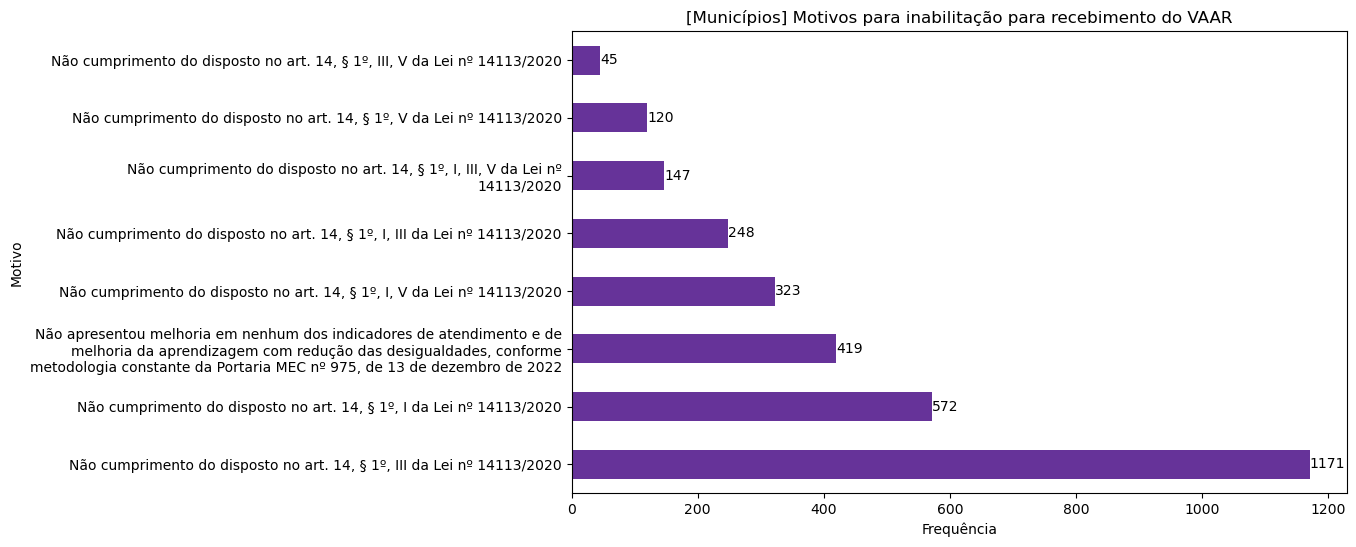

In [94]:
# Visualização:
# Aplicar a função de wrap aos rótulos
frequencia_VAAR_municipios.index = frequencia_VAAR_municipios.index.to_series().apply(lambda x: textwrap.fill(x, width=75))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
grafico = frequencia_VAAR_municipios.plot(kind='barh', color='rebeccapurple')

# Adicionar rótulos aos dados
for i, v in enumerate(frequencia_VAAR_municipios):
    plt.text(v + 0.1, i, str(v), ha='left', va='center')

plt.title('[Municípios] Motivos para inabilitação para recebimento do VAAR')
plt.xlabel('Frequência')
plt.ylabel('Motivo')

# Salvar o gráfico:
plt.savefig('Municipios_VAAR.png', bbox_inches='tight')  # bbox_inches='tight' evita que o título seja cortado

plt.show()

# VAAT (Valor Aluno Ano Total):

VAAT considera todas as receitas disponíveis vinculadas à Manutenção e Desenvolvimento do Ensino (MDE) em cada ente federado e complementa o valor por rede de ensino.
O ente só recebe os recursos da complementação se o seu VAAR for menor do que o mínimo definido nacionalmente.

Para se habilitar ao recebimento, o ente deve transmitir os dados contábeis , orçamentários e fiscais de dois anos anteriores ao do exercício de referência no Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro (Siconfi) e no Sistema de Informações sobre Orçamentos Públicos em Educação (Siope).

In [5]:
# Caminho para o seu arquivo PDF
caminho_pdf_VAAT = r"C:\Users\hugob\Dropbox\Hugo_Bovareto\Fundeb 2024\VAAT_2024.xlsx"

In [6]:
# Ler a planilha do Excel em um dataframe
df_VAAT = pd.read_excel(caminho_pdf_VAAT)

In [7]:
df_VAAT

,UF,Ente Federado,Código IBGE,Veficação preliminar do disposto no § 4º do art. 13 da Lei 14.113/20,Pendência identificada
0,AC,Acre,12,Habilitado para o cálculo do VAAT.,NaN
1,AC,Acrelândia,1200013,Habilitado para o cálculo do VAAT.,NaN
2,AC,Assis Brasil,1200054,Habilitado para o cálculo do VAAT.,NaN
3,AC,Brasiléia,1200104,Habilitado para o cálculo do VAAT.,NaN
4,AC,Bujari,1200138,Habilitado para o cálculo do VAAT.,NaN
...,...,...,...,...,...
5590,TO,Tocantins,17,Habilitado para o cálculo do VAAT.,NaN
5591,TO,Tupirama,1721257,Habilitado para o cálculo do VAAT.,NaN
5592,TO,Tupiratins,1721307,Habilitado para o cálculo do VAAT.,NaN
5593,TO,Wanderlândia,1722081,Habilitado para o cálculo do VAAT.,NaN


### Estados:

In [95]:
# Dataframe dos estados:
# Filtrando as linhas com valores de 2 dígitos na coluna 'Código IBGE':
df_VAAT_estados = df_VAAT[df_VAAT['Código IBGE'].astype(str).str.len() == 2]

df_VAAT_estados

,UF,Ente Federado,Código IBGE,Veficação preliminar do disposto no § 4º do art. 13 da Lei 14.113/20,Pendência identificada
0,AC,Acre,12,Habilitado para o cálculo do VAAT.,NaN
24,AL,Alagoas,27,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
128,AM,Amazonas,13,Habilitado para o cálculo do VAAT.,NaN
189,AP,Amapá,16,Habilitado para o cálculo do VAAT.,NaN
235,BA,Bahia,29,Habilitado para o cálculo do VAAT.,NaN
668,CE,Ceará,23,Habilitado para o cálculo do VAAT.,NaN
809,DF,Distrito Federal,53,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
835,ES,Espírito Santo,32,Habilitado para o cálculo do VAAT.,NaN
985,GO,Goiás,52,Habilitado para o cálculo do VAAT.,NaN
1247,MA,Maranhão,21,Habilitado para o cálculo do VAAT.,NaN


In [96]:
# Salvar no Excel:
df_VAAT_estados.to_excel("df_VAAT_estados.xlsx", index=False)

In [99]:
# Trocar todos os valores NaN da coluna 'Pendência identificada' por "Habilitado para o cálculo do VAAT."
# Isso vai fazer com que seja possível trabalhar somente com a coluna 'Pendência identificada' para fazer os gráficos
df_VAAT_estados['Pendência identificada'].fillna("Habilitado para o cálculo do VAAT.", inplace=True)

C:\Users\hugob\AppData\Local\Temp\ipykernel_8080\23006205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VAAT_estados['Pendência identificada'].fillna("Habilitado para o cálculo do VAAT.", inplace=True)


In [101]:
# Calculando a contagem de frequência dos valores na coluna 'Pendência identificada':
frequencia_VAAT_estados = df_VAAT_estados['Pendência identificada'].value_counts()
frequencia_VAAT_estados

Pendência identificada
Habilitado para o cálculo do VAAT.                                  20
Não transmitiu ao SIOPE os dados do ano de 2022.                     6
Enviou a MSC de encerramento com as receitas LÍQUIDAS negativas.     1
Name: count, dtype: int64

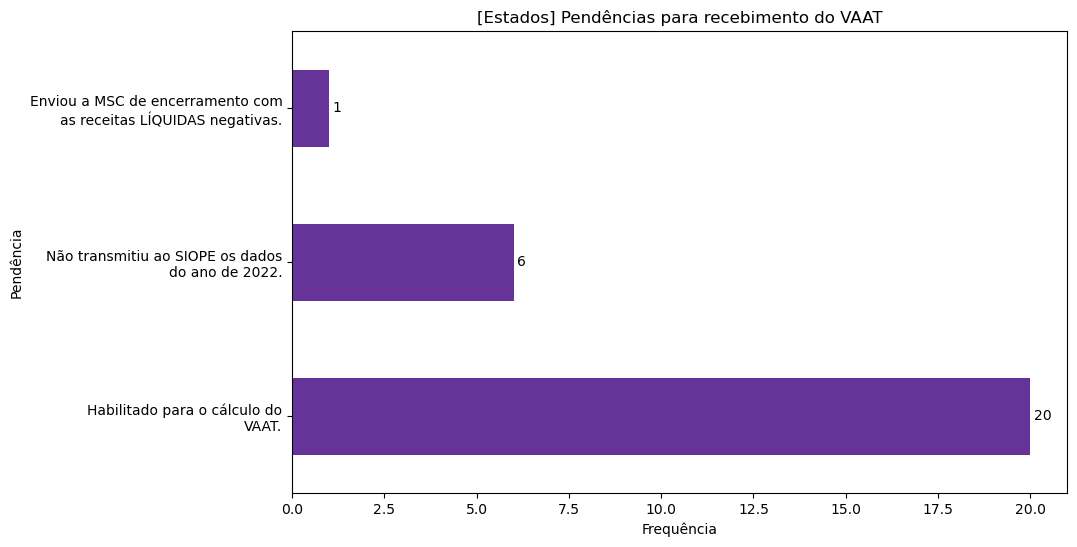

In [110]:
# Visualização:
# Aplicar a função de wrap aos rótulos
frequencia_VAAT_estados.index = frequencia_VAAT_estados.index.to_series().apply(lambda x: textwrap.fill(x, width=32))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
grafico = frequencia_VAAT_estados.plot(kind='barh', color='rebeccapurple')

# Adicionar rótulos aos dados
for i, v in enumerate(frequencia_VAAT_estados):
    plt.text(v + 0.1, i, str(v), ha='left', va='center')

plt.title('[Estados] Pendências para recebimento do VAAT')
plt.xlabel('Frequência')
plt.ylabel('Pendência')

# Salvar o gráfico:
plt.savefig('Estados_VAAT.png', bbox_inches='tight')  # bbox_inches='tight' evita que o título seja cortado

plt.show()

### Municípios:

In [97]:
# Dataframe dos municípios:

df_VAAT_municipios = df_VAAT.drop(df_VAAT_estados.index)

df_VAAT_municipios

,UF,Ente Federado,Código IBGE,Veficação preliminar do disposto no § 4º do art. 13 da Lei 14.113/20,Pendência identificada
1,AC,Acrelândia,1200013,Habilitado para o cálculo do VAAT.,NaN
2,AC,Assis Brasil,1200054,Habilitado para o cálculo do VAAT.,NaN
3,AC,Brasiléia,1200104,Habilitado para o cálculo do VAAT.,NaN
4,AC,Bujari,1200138,Habilitado para o cálculo do VAAT.,NaN
5,AC,Capixaba,1200179,Habilitado para o cálculo do VAAT.,NaN
...,...,...,...,...,...
5589,TO,Tocantinópolis,1721208,Habilitado para o cálculo do VAAT.,NaN
5591,TO,Tupirama,1721257,Habilitado para o cálculo do VAAT.,NaN
5592,TO,Tupiratins,1721307,Habilitado para o cálculo do VAAT.,NaN
5593,TO,Wanderlândia,1722081,Habilitado para o cálculo do VAAT.,NaN


In [102]:
# Salvar no Excel:
df_VAAT_municipios.to_excel("df_VAAT_municipios.xlsx", index=False)

In [103]:
# Trocar todos os valores NaN da coluna 'Pendência identificada' por "Habilitado para o cálculo do VAAT."
# Isso vai fazer com que seja possível trabalhar somente com a coluna 'Pendência identificada' para fazer os gráficos
df_VAAT_municipios['Pendência identificada'].fillna("Habilitado para o cálculo do VAAT.", inplace=True)

In [104]:
# Calculando a contagem de frequência dos valores na coluna 'Pendência identificada':
frequencia_VAAT_municipios = df_VAAT_municipios['Pendência identificada'].value_counts()
frequencia_VAAT_municipios

Pendência identificada
Habilitado para o cálculo do VAAT.                                                             5481
Não transmitiu ao SIOPE os dados do ano de 2022.                                                 65
Não enviou a MSC de encerramento de 2022. Não transmitiu ao SIOPE os dados\ndo ano de 2022.       7
Não enviou a MSC de encerramento de 2022.                                                         5
Enviou a MSC de encerramento com as Receitas zeradas.                                             5
Enviou a MSC de encerramento com a COTA-PARTE de ICMS zerada ou\nnegativa.                        4
Enviou a MSC de encerramento com as receitas LÍQUIDAS negativas.                                  1
Name: count, dtype: int64

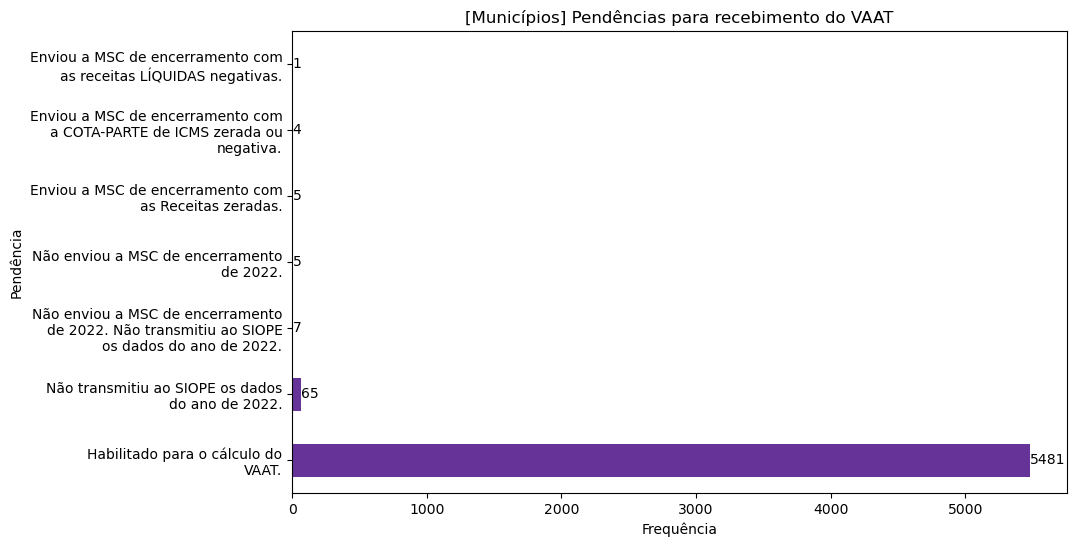

In [111]:
# Visualização:
# Aplicar a função de wrap aos rótulos
frequencia_VAAT_municipios.index = frequencia_VAAT_municipios.index.to_series().apply(lambda x: textwrap.fill(x, width=32))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
grafico = frequencia_VAAT_municipios.plot(kind='barh', color='rebeccapurple')

# Adicionar rótulos aos dados
for i, v in enumerate(frequencia_VAAT_municipios):
    plt.text(v + 0.1, i, str(v), ha='left', va='center')

plt.title('[Municípios] Pendências para recebimento do VAAT')
plt.xlabel('Frequência')
plt.ylabel('Pendência')

# Salvar o gráfico:
plt.savefig('Municipios_VAAT.png', bbox_inches='tight')  # bbox_inches='tight' evita que o título seja cortado

plt.show()

5481 redes municipais habilitadas para os cálculos do VAAT.

In [113]:
# Apenas municípios com pendências:
df_VAAT_municipios_pendencias = df_VAAT_municipios[df_VAAT_municipios['Pendência identificada'] != "Habilitado para o cálculo do VAAT."]
df_VAAT_municipios_pendencias

,UF,Ente Federado,Código IBGE,Veficação preliminar do disposto no § 4º do art. 13 da Lei 14.113/20,Pendência identificada
159,AM,Juruá,1302207,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
191,AP,Calçoene,1600204,Inobservância do art. 163-A da CF e do art. 38...,Não enviou a MSC de encerramento de 2022. Não ...
192,AP,Cutias,1600212,Inobservância do art. 163-A da Constituição Fe...,Não enviou a MSC de encerramento de 2022.
194,AP,Itaubal,1600253,Inobservância do art. 163-A da Constituição Fe...,Não enviou a MSC de encerramento de 2022.
198,AP,Oiapoque,1600501,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
...,...,...,...,...,...
5379,SP,São Sebastião da Grama,3550803,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
5401,SP,Taciba,3552908,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
5403,SP,Taiaçu,3553104,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.
5436,SP,União Paulista,3555703,Inobservância do art. 38 da Lei nº 14.113/20.,Não transmitiu ao SIOPE os dados do ano de 2022.


In [114]:
# Calculando a contagem de frequência dos valores na coluna 'Motivo':
frequencia_VAAT_municipios_pendencias = df_VAAT_municipios_pendencias['Pendência identificada'].value_counts()
frequencia_VAAT_municipios_pendencias

Pendência identificada
Não transmitiu ao SIOPE os dados do ano de 2022.                                               65
Não enviou a MSC de encerramento de 2022. Não transmitiu ao SIOPE os dados\ndo ano de 2022.     7
Não enviou a MSC de encerramento de 2022.                                                       5
Enviou a MSC de encerramento com as Receitas zeradas.                                           5
Enviou a MSC de encerramento com a COTA-PARTE de ICMS zerada ou\nnegativa.                      4
Enviou a MSC de encerramento com as receitas LÍQUIDAS negativas.                                1
Name: count, dtype: int64

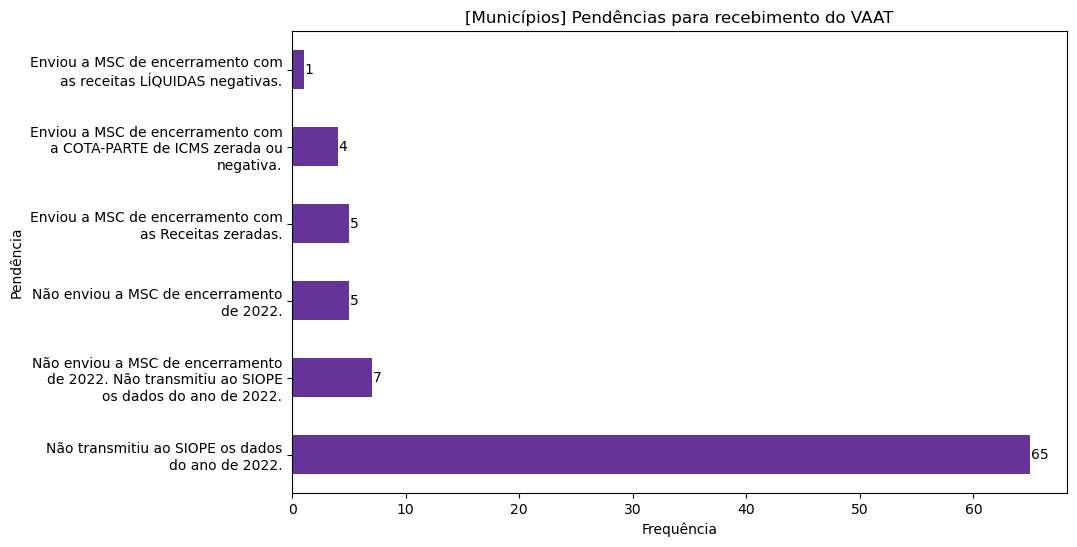

In [115]:
# Visualização:
# Aplicar a função de wrap aos rótulos
frequencia_VAAT_municipios_pendencias.index = frequencia_VAAT_municipios_pendencias.index.to_series().apply(lambda x: textwrap.fill(x, width=32))

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
grafico = frequencia_VAAT_municipios_pendencias.plot(kind='barh', color='rebeccapurple')

# Adicionar rótulos aos dados
for i, v in enumerate(frequencia_VAAT_municipios_pendencias):
    plt.text(v + 0.1, i, str(v), ha='left', va='center')

plt.title('[Municípios] Pendências para recebimento do VAAT')
plt.xlabel('Frequência')
plt.ylabel('Pendência')

# Salvar o gráfico:
plt.savefig('Municipios_VAAT_pendencias.png', bbox_inches='tight')  # bbox_inches='tight' evita que o título seja cortado

plt.show()